In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('C:\\Users\\Daniele\\Desktop\\Homework 5\\USA-road-d.CAL.gr.gz', compression='gzip', header=0, sep=',', quotechar='"')

In [6]:
df = df[6:]

In [7]:
df.rename(columns = {'c 9th DIMACS Implementation Challenge: Shortest Paths':'arc'},inplace = True)

In [8]:
list_df = df.values.tolist()

In [9]:
lis_df = []
for i in list_df:
    lis_df.append(list(map(int,(i[0].split())[1:])))

In [10]:
from collections import defaultdict

tree = defaultdict(list)
weight = defaultdict(list)

graph = lis_df

for i in range(len(lis_df)):
    id_node1 = graph[i][0]
    id_node2 = graph[i][1]
    w =graph[i][2] 
    
    tree[id_node1].append(id_node2)
    
    w_k = str(id_node1) +',' +(str(id_node2))
    weight[w_k].append(w)
    

In [18]:
def bfs(graph,v,weight,k):
    distance = {}
    for item in tree.keys():
        distance[item] = np.inf
    distance[v] = 0
    queue, output = [],[]
    queue.append(v)
    output.append(v)
    connection = []

    while queue:
        v = queue[0]
        queue.pop(0)
        for u in tree[v]:
            w_k = str(v)+','+str(u)
            if len(weight[w_k])>0:
                if distance[u] > distance[v] + weight[w_k][0]:
                    distance[u] = distance[v] + weight[w_k][0]
                    if distance[u] != np.inf and distance[u] <= k:
                        queue.append(u)
                        output.append(u)
                        connection.append(w_k)
                    
    return output,connection

In [22]:
result = bfs(tree,5,weight,10000)

In [23]:
result[0]

[5, 2244, 1048581, 1050375]

In [24]:
conn = result[1]

In [25]:
conn

['5,2244', '5,1048581', '2244,1050375']

In [20]:
import networkx as nx

In [21]:
G = nx.Graph()

In [36]:
for i in conn:
    j = list(map(int,(i.split(','))))
    G.add_node(j[0])
    G.add_node(j[1])
    G.add_edge(j[0], j[1], weight = weight[i][0])
    
    

In [42]:
import matplotlib.pyplot as plt 

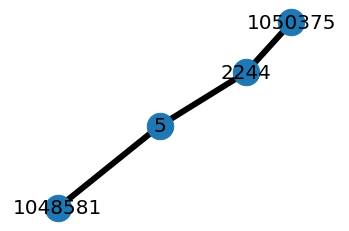

In [46]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()